# TS1: Síntesis de señales

## Alumno: Felipe Berganza

1) Sintetizar y graficar:

a.Una señal sinusoidal de 2KHz.

b.Misma señal amplificada y desfazada en π/2.

c.Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.

d.Señal anterior recortada al 75% de su amplitud.

e.Una señal cuadrada de 4KHz.

f.Un pulso rectangular de 10ms.

g.En cada caso indique tiempo entre muestras, número de muestras y potencia o energía según corresponda.

## 1.a Sintetizar y graficar: Una señal sinusoidal de 2KHz.

Tiempo entre muestras: 0.0227 ms
Número de muestras: 441

1. Señal sinusoidal de 2kHz - Potencia: 0.5000


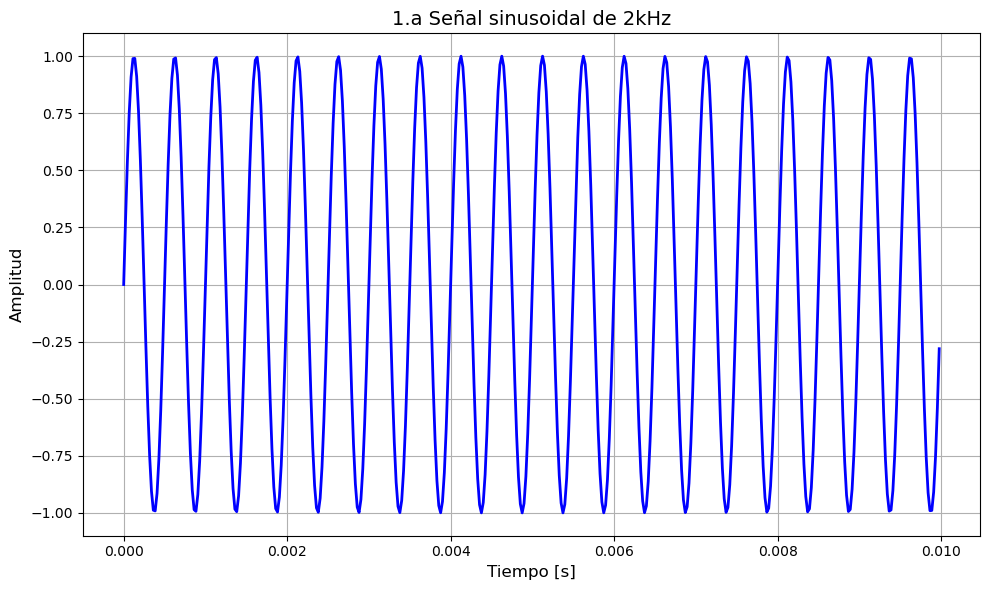

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import psutil

# Parámetros generales
fs = 44100  # Frecuencia de muestreo [Hz]
t_total = 0.01  # Tiempo total de simulación [s] (10 ms)
nn = int(fs * t_total)  # Número de muestras
Ts = 1/fs  # Tiempo entre muestras [s]

print(f"Tiempo entre muestras: {Ts*1000:.4f} ms")
print(f"Número de muestras: {nn}")

# Frecuencia fundamental
f1 = 2000  # 2 kHz

# 1.a Defino la funcion seno
def funcion_sen(vmax, dc, ff, ph, nn, fs):
    t_total = nn / fs  # Tiempo total de muestreo
    tt = np.linspace(0, t_total, nn, endpoint=False)  # Vector de tiempo
    
    # Creo la señal senoidal
    xx = vmax * np.sin(2 * np.pi * ff * tt + ph) + dc
    
    return tt, xx

# 1.a Señal sinusoidal de 2kHz
tt, xx1 = funcion_sen(vmax=1, dc=0, ff=f1, ph=0, nn=nn, fs=fs)
potencia_xx1 = np.mean(xx1**2)
print(f"\n1. Señal sinusoidal de 2kHz - Potencia: {potencia_xx1:.4f}")

# 1.a Señal sinusoidal de 2kHz
plt.figure(figsize=(10, 6))
plt.plot(tt[:1000], xx1[:1000], 'b-', linewidth=2)
plt.title('1.a Señal sinusoidal de 2kHz', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



En este punto se creo una funcion seno utilizando la libre de numpy, esta misma esta muestrada en un rango acorde para poder visualizar la funcion de forma detallada. 

## 1.b Misma señal amplificada y desfazada en π/2.

2. Señal amplificada y desfasada - Potencia: 2.0000


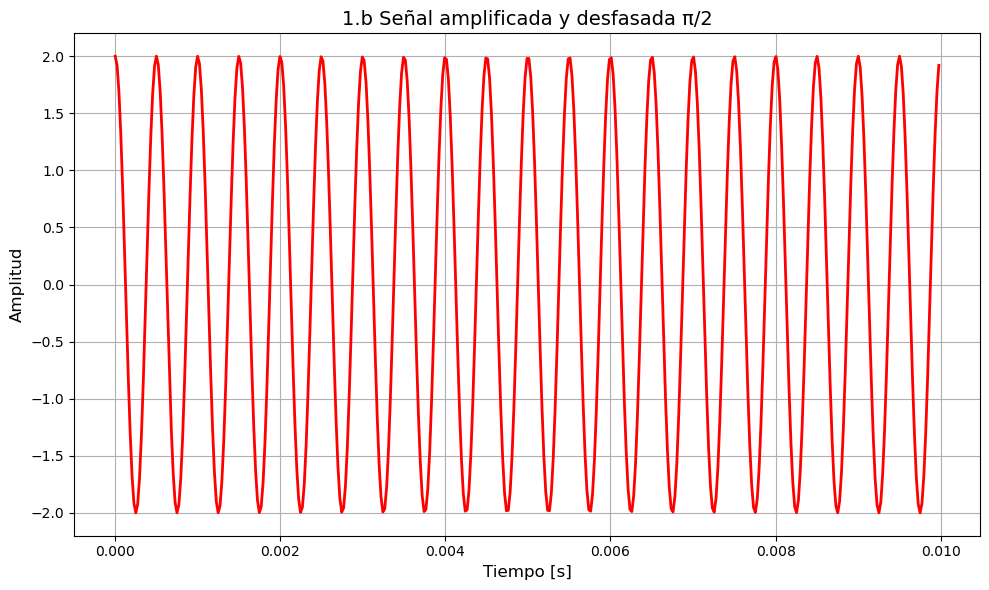

In [8]:
# 1.b Señal amplificada con un factor de 2 y desfasada en π/2 
tt, xx2 = funcion_sen(vmax=2, dc=0, ff=f1, ph=np.pi/2, nn=nn, fs=fs)
potencia_xx2 = np.mean(xx2**2)
print(f"2. Señal amplificada y desfasada - Potencia: {potencia_xx2:.4f}")

# 1.b Señal amplificada y desfasada
plt.figure(figsize=(10, 6))
plt.plot(tt[:1000], xx2[:1000], 'r-', linewidth=2)
plt.title('1.b Señal amplificada y desfasada π/2', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



## 1.b Señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.

La modulación en amplitud (AM) es una técnica donde la amplitud de una señal de alta frecuencia (portadora) varía en proporción a la amplitud de una señal de baja frecuencia (moduladora).

In [ ]:
# 1.c Señal modulada en amplitud    
# Creo la señal moduladora (mitad de frecuencia)
tt, portadora = funcion_sen(vmax=1, dc=0, ff=f1/2, ph=0, nn=nn, fs=fs)
modulacion = xx1 * portadora
potencia_modulacion = np.mean(modulacion**2)
print(f"3. Señal modulada AM - Potencia: {potencia_modulacion:.4f}")

# 1.c Señal modulada AM
plt.figure(figsize=(10, 6))
plt.plot(tt[:2000], modulacion[:2000], 'g-', linewidth=2)
plt.title('1.c Señal modulada AM', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## 1.e Señal original recortada al 75% de su amplitud.

4. Señal recortada al 75% - Potencia: 0.4455


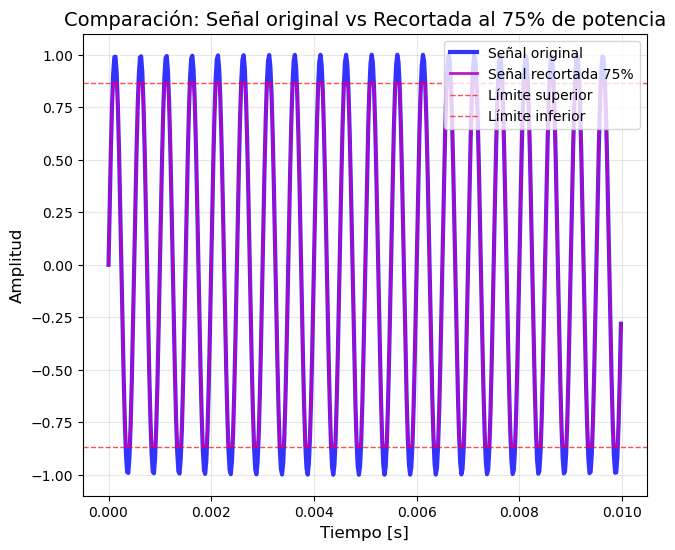

In [15]:
# 1.4 Señal recortada al 75% de su potencia
# Calculo amplitud para 75% de potencia
amplitud_pico_original = np.max(np.abs(xx1))
potencia_original = (amplitud_pico_original**2) / 2
amplitud_pico_deseada = np.sqrt(2 * 0.75 * potencia_original)

# Recorto la señal
senal_recortada = np.clip(xx1, -amplitud_pico_deseada, amplitud_pico_deseada)
potencia_recortada = np.mean(senal_recortada**2)
print(f"4. Señal recortada al 75% - Potencia: {potencia_recortada:.4f}")


plt.figure(figsize=(16, 6))  
plt.subplot(1, 2, 2)
plt.plot(tt[:1000], xx1[:1000], 'b-', linewidth=3, label='Señal original', alpha=0.8)
plt.plot(tt[:1000], senal_recortada[:1000], 'm-', linewidth=2, label='Señal recortada 75%', alpha=0.9)
plt.axhline(y=amplitud_pico_deseada, color='r', linestyle='--', alpha=0.7, linewidth=1, label='Límite superior')
plt.axhline(y=-amplitud_pico_deseada, color='r', linestyle='--', alpha=0.7, linewidth=1, label='Límite inferior')
plt.title('Comparación: Señal original vs Recortada al 75% de potencia', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)